In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [5]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [6]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=2)

In [7]:
xtrain['Age_imputed'] = xtrain['Age']
xtest['Age_imputed'] = xtest['Age']

In [8]:
xtrain['Age_imputed'][xtrain['Age_imputed'].isnull()]         #extracted all null values

77    NaN
868   NaN
334   NaN
295   NaN
792   NaN
       ..
674   NaN
466   NaN
584   NaN
527   NaN
168   NaN
Name: Age_imputed, Length: 148, dtype: float64

In [11]:
xtrain['Age'].dropna().sample(xtrain['Age'].isnull().sum()).values         #random values to replace with above null values

array([24.  , 50.  , 10.  , 40.  ,  8.  , 34.5 , 20.  , 33.  , 30.  ,
        4.  , 22.  , 20.  , 26.  , 35.  , 62.  , 49.  , 22.  , 28.  ,
       22.  , 24.  ,  0.75,  5.  , 41.  , 36.  , 21.  , 54.  , 14.  ,
       22.  , 18.  , 18.  , 15.  , 32.  , 39.  , 30.  , 21.  , 30.  ,
       27.  , 52.  , 51.  , 13.  , 48.  , 50.  , 23.  , 44.  , 38.  ,
       48.  , 30.  , 32.  , 24.  , 18.  , 26.  , 20.  , 47.  , 20.  ,
       31.  , 16.  , 23.  , 24.  , 29.  , 35.  , 29.  , 24.  , 25.  ,
       34.  , 38.  ,  9.  , 35.  , 19.  , 24.  , 25.  , 33.  , 28.5 ,
       26.  , 19.  , 60.  , 23.  , 21.  , 21.  , 30.  , 36.  , 27.  ,
       41.  , 36.  , 36.  , 26.  , 58.  , 58.  , 25.  , 65.  , 61.  ,
       38.  , 29.  ,  0.75, 22.  , 20.  , 32.  ,  4.  , 39.  , 27.  ,
        0.67, 39.  , 29.  , 24.  , 54.  , 33.  ,  2.  , 71.  , 23.  ,
       23.5 , 21.  , 62.  , 31.  , 17.  , 22.  , 32.  , 21.  ,  0.42,
       34.  , 21.  , 14.  , 34.  , 23.  , 50.  , 42.  , 18.  , 18.  ,
       35.  , 40.  ,

In [12]:
xtrain['Age_imputed'][xtrain['Age_imputed'].isnull()] = xtrain['Age'].dropna().sample(xtrain['Age'].isnull().sum()).values 
xtest['Age_imputed'][xtest['Age_imputed'].isnull()] = xtest['Age'].dropna().sample(xtest['Age'].isnull().sum()).values 

C:\Users\athar\AppData\Local\Temp\ipykernel_11916\2883392946.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  xtrain['Age_imputed'][xtrain['Age_imputed'].isnull()] = xtrain['Age'].dropna().sample(xtrain['Age'].isnull().sum()).values
C:\Us

In [13]:
xtrain,xtest

(      Age      Fare  Age_imputed
 30   40.0   27.7208         40.0
 10    4.0   16.7000          4.0
 873  47.0    9.0000         47.0
 182   9.0   31.3875          9.0
 876  20.0    9.8458         20.0
 ..    ...       ...          ...
 534  30.0    8.6625         30.0
 584   NaN    8.7125         47.0
 493  71.0   49.5042         71.0
 527   NaN  221.7792         45.5
 168   NaN   25.9250         29.0
 
 [712 rows x 3 columns],
       Age     Fare  Age_imputed
 707  42.0  26.2875         42.0
 37   21.0   8.0500         21.0
 615  24.0  65.0000         24.0
 169  28.0  56.4958         28.0
 68   17.0   7.9250         17.0
 ..    ...      ...          ...
 89   24.0   8.0500         24.0
 80   22.0   9.0000         22.0
 846   NaN  69.5500         36.0
 870  26.0   7.8958         26.0
 251  29.0  10.4625         29.0
 
 [179 rows x 3 columns])

C:\Users\athar\AppData\Local\Temp\ipykernel_11916\619381073.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtrain['Age'],label='Original',hist=False)
C:\Users\athar\AppData\Local\Temp\ipykernel_11916\619381073.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtrain['Age

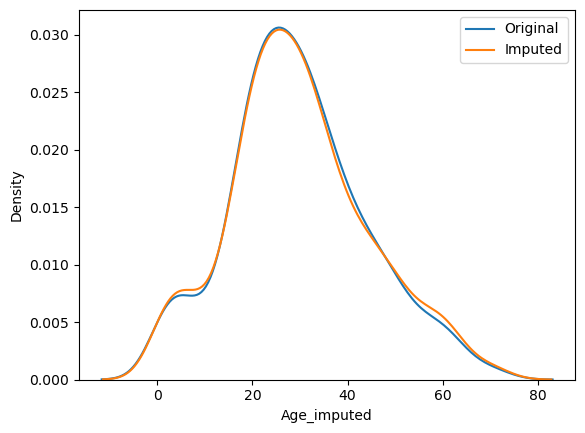

In [14]:
sns.distplot(xtrain['Age'],label='Original',hist=False)
sns.distplot(xtrain['Age_imputed'],label='Imputed',hist=False)
plt.legend()
plt.show()

In [15]:
#minor difference in distribution of data
#lets check variance
print('Original variable variance= ',xtrain['Age'].var())
print('Variance after random imputation= ',xtest['Age'].var())

Original variable variance=  204.3495133904614
Variance after random imputation=  237.50093573154342


In [17]:
xtrain[['Fare','Age','Age_imputed']].cov()
#covariance changed

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,62.417529
Age,71.512440,204.349513,204.349513
Age_imputed,62.417529,204.349513,214.523712


<Axes: >

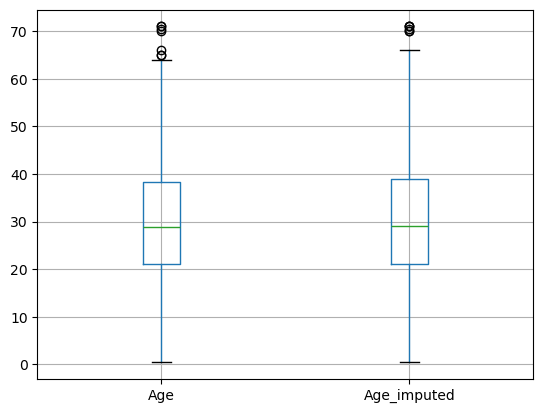

In [18]:
xtrain[['Age','Age_imputed']].boxplot()

In [20]:
#some outliners are eliminated

In [44]:
data = pd.read_csv('house.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [45]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [46]:
x = data
y = data['SalePrice']

In [47]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=2)

In [48]:
xtrain['FireplaceQu_imputed'] = xtrain['FireplaceQu']
xtest['FireplaceQu_imputed'] = xtest['FireplaceQu']

xtrain['GarageQual_imputed'] = xtrain['GarageQual']
xtest['GarageQual_imputed'] = xtest['GarageQual']


In [49]:
xtrain.sample(5)

,FireplaceQu,GarageQual,SalePrice,FireplaceQu_imputed,GarageQual_imputed
871,NaN,TA,200500,NaN,TA
80,Gd,TA,193500,Gd,TA
100,TA,TA,205000,TA,TA
389,Ex,TA,426000,Ex,TA
107,NaN,TA,115000,NaN,TA


In [50]:
xtrain['FireplaceQu_imputed'][xtrain['FireplaceQu_imputed'].isnull()] = xtrain['FireplaceQu'].dropna().sample(xtrain['FireplaceQu'].isnull().sum()).values 
xtest['FireplaceQu_imputed'][xtest['FireplaceQu_imputed'].isnull()] = xtrain['FireplaceQu'].dropna().sample(xtrain['FireplaceQu'].isnull().sum()).values 

xtrain['GarageQual_imputed'][xtrain['GarageQual_imputed'].isnull()] = xtrain['GarageQual'].dropna().sample(xtrain['GarageQual'].isnull().sum()).values 
xtest['GarageQual_imputed'][xtest['GarageQual_imputed'].isnull()] = xtrain['GarageQual'].dropna().sample(xtrain['GarageQual'].isnull().sum()).values 


C:\Users\athar\AppData\Local\Temp\ipykernel_11916\1060559099.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  xtrain['FireplaceQu_imputed'][xtrain['FireplaceQu_imputed'].isnull()] = xtrain['FireplaceQu'].dropna().sample(xtrain['FireplaceQ

ValueError: cannot assign mismatch length to masked array

In [51]:
#checking frequency of values in the columns before and after imputation

temp = pd.concat([
    xtrain['GarageQual'].value_counts()/len(xtrain['GarageQual'].dropna()),
    xtrain['GarageQual_imputed'].value_counts()/len(xtrain)
],
axis=1)

temp.columns = ['original','imputed']

In [52]:
temp

,original,imputed
TA,0.951043,0.951199
Fa,0.037171,0.035959
Gd,0.009973,0.010274
Po,0.000907,0.001712
Ex,0.000907,0.000856


In [53]:
temp = pd.concat([
    xtrain['FireplaceQu'].value_counts()/len(xtrain['FireplaceQu'].dropna()),
    xtrain['FireplaceQu_imputed'].value_counts()/len(xtrain)
],
axis=1)

temp.columns = ['original','imputed']

In [54]:
temp

,original,imputed
Gd,0.494272,0.495719
TA,0.412439,0.411815
Fa,0.040917,0.041096
Po,0.027823,0.027397
Ex,0.024550,0.023973


C:\Users\athar\AppData\Local\Temp\ipykernel_11916\4220601689.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtrain[xtrain['FireplaceQu']==category]['SalePrice'],hist=False,label=category)
C:\Users\athar\AppData\Local\Temp\ipykernel_11916\4220601689.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637

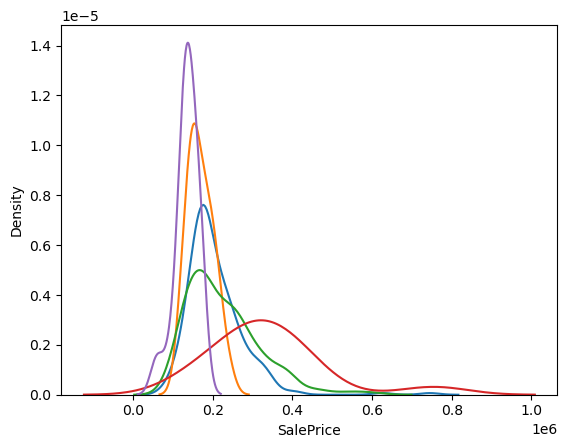

In [55]:
for category in xtrain['FireplaceQu'].dropna().unique():
    sns.distplot(xtrain[xtrain['FireplaceQu']==category]['SalePrice'],hist=False,label=category)

plt.show()

C:\Users\athar\AppData\Local\Temp\ipykernel_11916\274367642.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtrain[xtrain['FireplaceQu_imputed']==category]['SalePrice'],hist=False,label=category)
C:\Users\athar\AppData\Local\Temp\ipykernel_11916\274367642.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297445

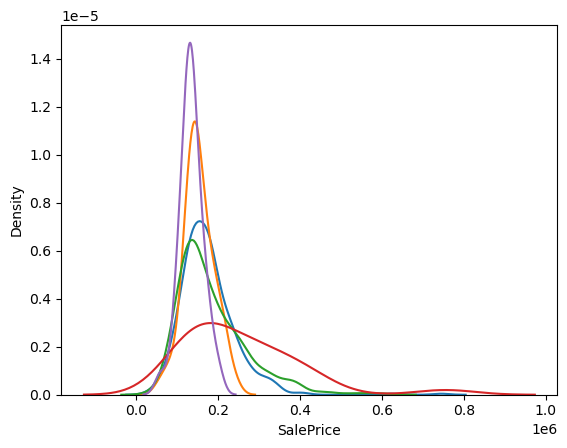

In [56]:
for category in xtrain['FireplaceQu'].dropna().unique():
    sns.distplot(xtrain[xtrain['FireplaceQu_imputed']==category]['SalePrice'],hist=False,label=category)

plt.show()

In [57]:
#distribution changed after imputation , not good for linear model

In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import MissingIndicator,SimpleImputer

In [59]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [60]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [62]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [68]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=2)

In [64]:
xtrain.head()

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458


In [41]:
si = SimpleImputer()
xtrain_trf = si.fit_transform(xtrain)
xtest_trf = si.transform(xtest)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(xtrain_trf,ytrain)

y_pred = clf.predict(xtest_trf)

from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_pred)

In [69]:
si = SimpleImputer(add_indicator=True)
xtrain_trf = si.fit_transform(xtrain)
xtest_trf = si.transform(xtest)

In [70]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(xtrain_trf,ytrain)

y_pred = clf.predict(xtest_trf)

from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_pred)

0.6312849162011173